### 🫀 Introduction
#### Heart disease is a major health concern globally, and early detection is crucial for effective treatment. In this project, I use machine learning techniques to predict the presence of heart disease based on clinical features like age, sex, blood pressure, cholesterol, and more.The goal is to build an accurate model that can assist in identifying high-risk patients early.

#### 📋 Key Features

- **Age**: Age of the person (in years)
- **Sex**: Gender (M = Male, F = Female)
- **ChestPainType**: Type of chest pain experienced (e.g., Typical Angina, Atypical Angina, Non-anginal Pain, Asymptomatic)
- **RestingBP**: Resting blood pressure (in mm Hg)
- **Cholesterol**: Serum cholesterol level (in mg/dl)
- **FastingBS**: Fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
- **RestingECG**: Results of resting electrocardiogram (Normal, ST-T abnormality, etc.)
- **MaxHR**: Maximum heart rate achieved during exercise
- **ExerciseAngina**: Exercise-induced angina (Y = Yes, N = No)
- **Oldpeak**: ST depression induced by exercise relative to rest
- **ST_Slope**: Slope of the peak exercise ST segment (Up, Flat, Down)
- **HeartDisease**: Target variable (1 = Presence of heart disease, 0 = Absence of heart disease)


In [93]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 📥 Data Collection

In [94]:
df = pd.read_csv('heart.csv')
df.head() 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [95]:
df.shape 

(918, 12)

In [96]:
df.describe() 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [97]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [98]:
# missing values 
df.isnull().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##### There are no missing values in this dataset 

In [99]:
df.HeartDisease.value_counts(normalize=True) 

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

55% and 44% is moderately balanced dataset and it's not very biased

### 📊 Data Visualization

In [100]:
df.head() 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [101]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [102]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

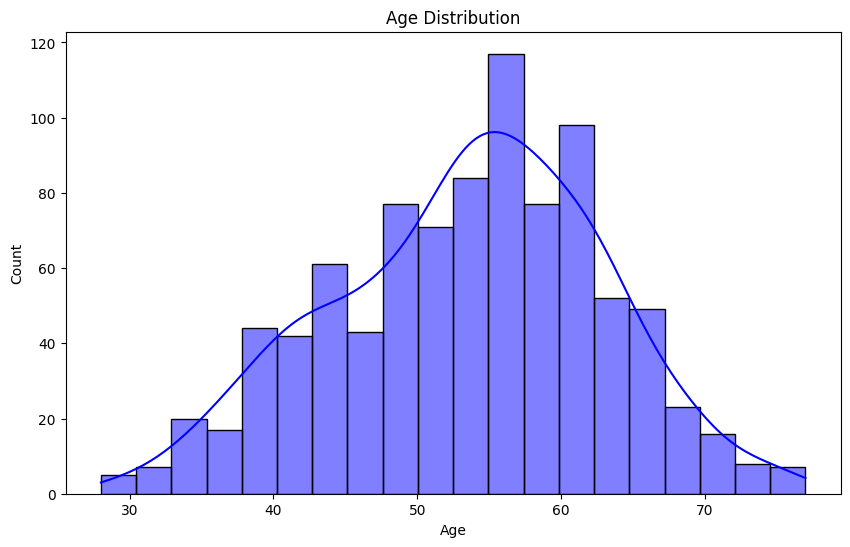

In [103]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show() 

# Age distribution is almost normal, with a slight right skew.

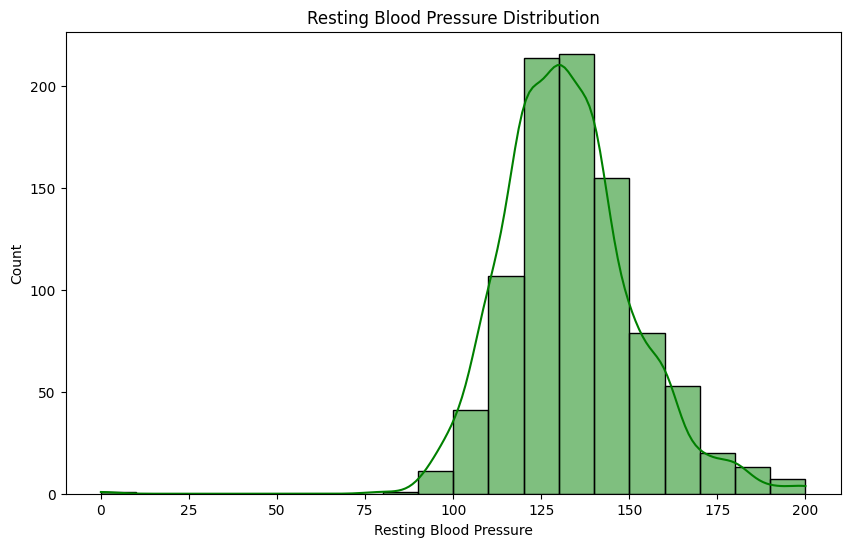

In [104]:
# RestingBP distribution 
plt.figure(figsize=(10, 6)) 
sns.histplot(df.RestingBP, bins=20, kde=True, color='green')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure') 
plt.ylabel('Count')
plt.show() 

# RestingBP distribution is right skewed, with a few outliers on the right side.

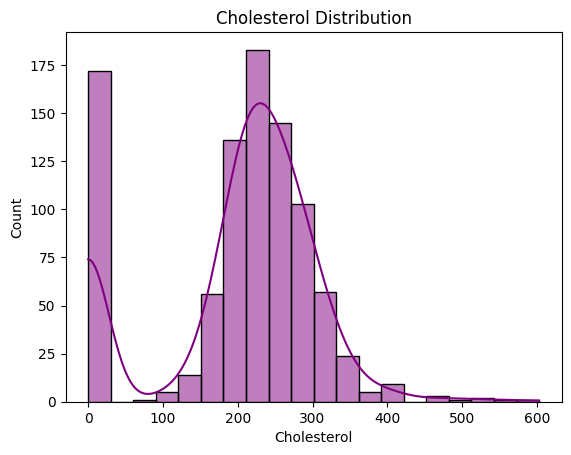

In [105]:
# Cholesterol distribution 
sns.histplot(df.Cholesterol, bins=20, kde=True, color='purple') 
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

# Cholesterol distribution is right skewed, with a few outliers on the right side.

In [106]:
df[df.Cholesterol == 0].shape[0]

172

In [107]:
df[df.Cholesterol != 0].shape[0]

746

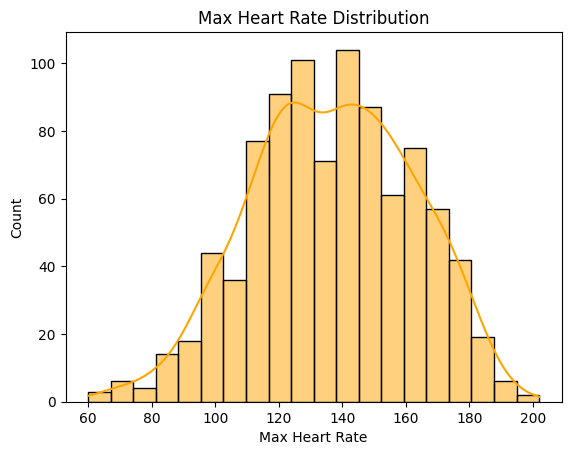

In [108]:
# MaxHR distribution
sns.histplot(df.MaxHR, bins=20, kde=True, color='orange')
plt.title('Max Heart Rate Distribution')
plt.xlabel('Max Heart Rate')
plt.ylabel('Count') 
plt.show() 

# MaxHR distribution is almost normal, with a slight left skew.

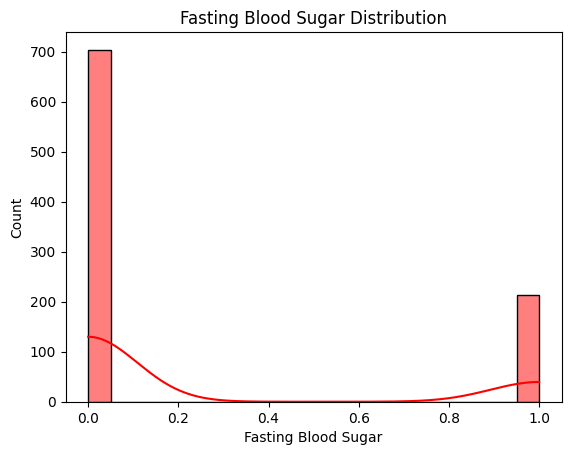

In [109]:
# FastingBS distribution
sns.histplot(df.FastingBS, bins=20, kde=True, color='red')
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.show()

# FastingBS distribution is bimodal, with two peaks at 0 and 1. 

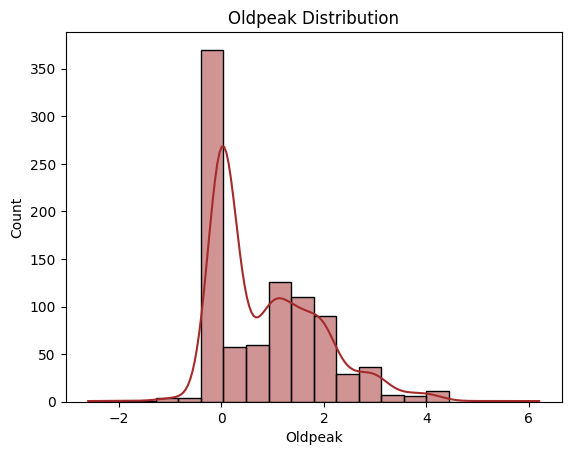

In [110]:
sns.histplot(df['Oldpeak'], bins=20, kde=True, color='brown')
plt.title('Oldpeak Distribution')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.show()


In [111]:
df.Oldpeak.value_counts(normalize=True)

Oldpeak
 0.0    0.400871
 1.0    0.093682
 2.0    0.082789
 1.5    0.057734
 3.0    0.030501
 1.2    0.028322
 0.2    0.023965
 0.5    0.020697
 1.4    0.019608
 1.8    0.018519
 2.5    0.017429
 1.6    0.017429
 0.8    0.017429
 0.1    0.015251
 0.6    0.015251
 0.3    0.011983
 0.4    0.011983
 4.0    0.008715
 2.8    0.007625
 0.7    0.007625
 1.3    0.007625
 1.1    0.007625
 2.6    0.007625
 1.9    0.007625
 1.7    0.006536
 2.2    0.005447
 3.6    0.004357
 0.9    0.004357
 2.4    0.004357
 3.4    0.003268
 2.1    0.002179
 3.2    0.002179
 2.3    0.002179
-1.0    0.002179
 4.2    0.002179
 3.5    0.002179
-0.1    0.002179
-0.5    0.002179
 5.0    0.001089
-0.7    0.001089
-0.8    0.001089
-1.5    0.001089
-0.9    0.001089
-2.6    0.001089
-1.1    0.001089
 3.7    0.001089
-2.0    0.001089
 3.1    0.001089
 5.6    0.001089
 3.8    0.001089
 2.9    0.001089
 6.2    0.001089
 4.4    0.001089
Name: proportion, dtype: float64

In [112]:
df.FastingBS.value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

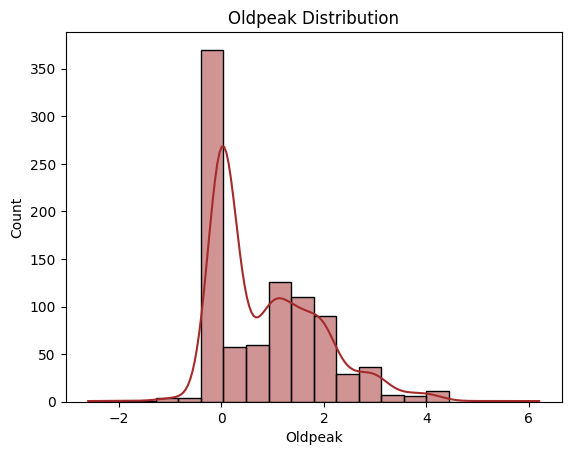

In [113]:
# oldpeak distribution
sns.histplot(df.Oldpeak, bins=20, kde=True, color='brown')
plt.title('Oldpeak Distribution')  
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.show()

# Oldpeak distribution is right skewed, with a few outliers on the right side.

C:\Users\madhu\AppData\Local\Temp\ipykernel_32492\2027220018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='Set2')


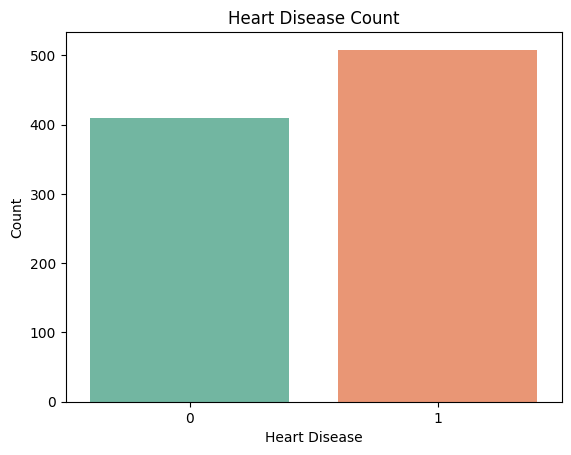

In [114]:
# check the class imabalance of the target variable
sns.countplot(x='HeartDisease', data=df, palette='Set2')
plt.title('Heart Disease Count')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# The dataset is imbalanced, with more instances of 0 (no heart disease) than 1 (heart disease). but its not too much imbalanced. 

C:\Users\madhu\AppData\Local\Temp\ipykernel_32492\3656790666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Age', data=df, palette='Set2')


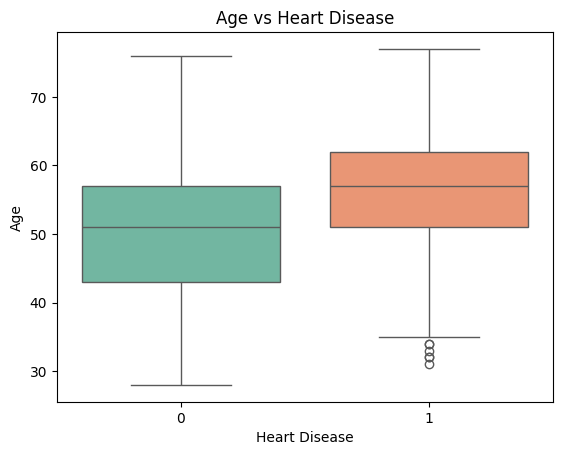

In [115]:
# Age vs Heart Disease
sns.boxplot(x='HeartDisease', y='Age', data=df, palette='Set2')
plt.title('Age vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show() 

# The boxplot shows that the median age of patients with heart disease is higher than those without heart disease.
# The interquartile range (IQR) is also higher for patients with heart disease, indicating that there is more variability in age among those patients.

C:\Users\madhu\AppData\Local\Temp\ipykernel_32492\2379652495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Cholesterol', data=df, palette='Set2')


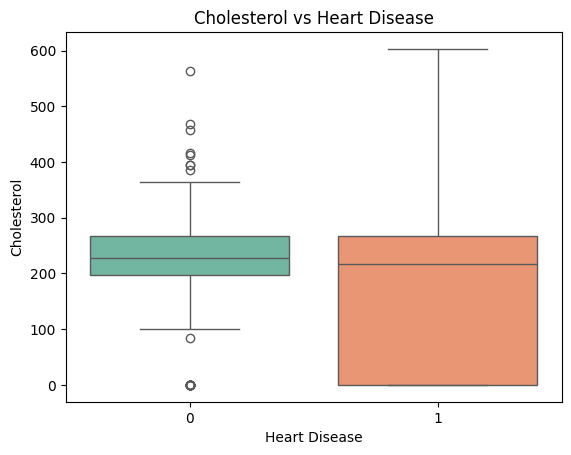

In [116]:
# Cholesterol vs Heart Disease 
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df, palette='Set2') 
plt.title('Cholesterol vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show() 

# this shows that the median cholesterol level of patients with heart disease is higher than those without heart disease.
# The interquartile range (IQR) is also higher for patients with heart disease, indicating that there is more variability in cholesterol levels among those patients.

C:\Users\madhu\AppData\Local\Temp\ipykernel_32492\766525458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='MaxHR', data=df, palette='Set2')


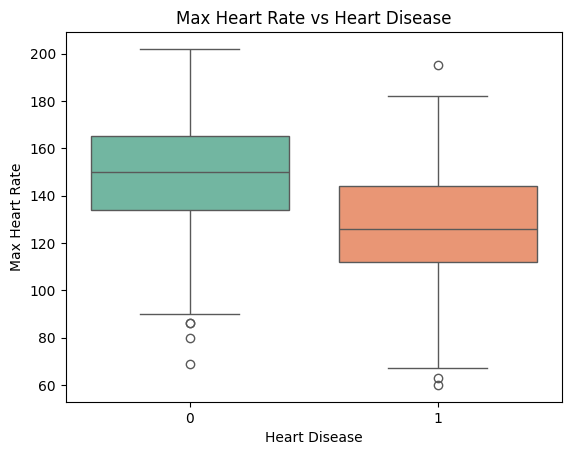

In [117]:
# MaxHR vs Heart Disease 
sns.boxplot(x='HeartDisease', y='MaxHR', data=df, palette='Set2') 
plt.title('Max Heart Rate vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Max Heart Rate')
plt.show() 

# The boxplot shows that the median max heart rate of patients without heart disease is higher than those with heart disease.
# The interquartile range (IQR) is also higher for patients without heart disease, indicating that there is more variability in max heart rate among those patients.

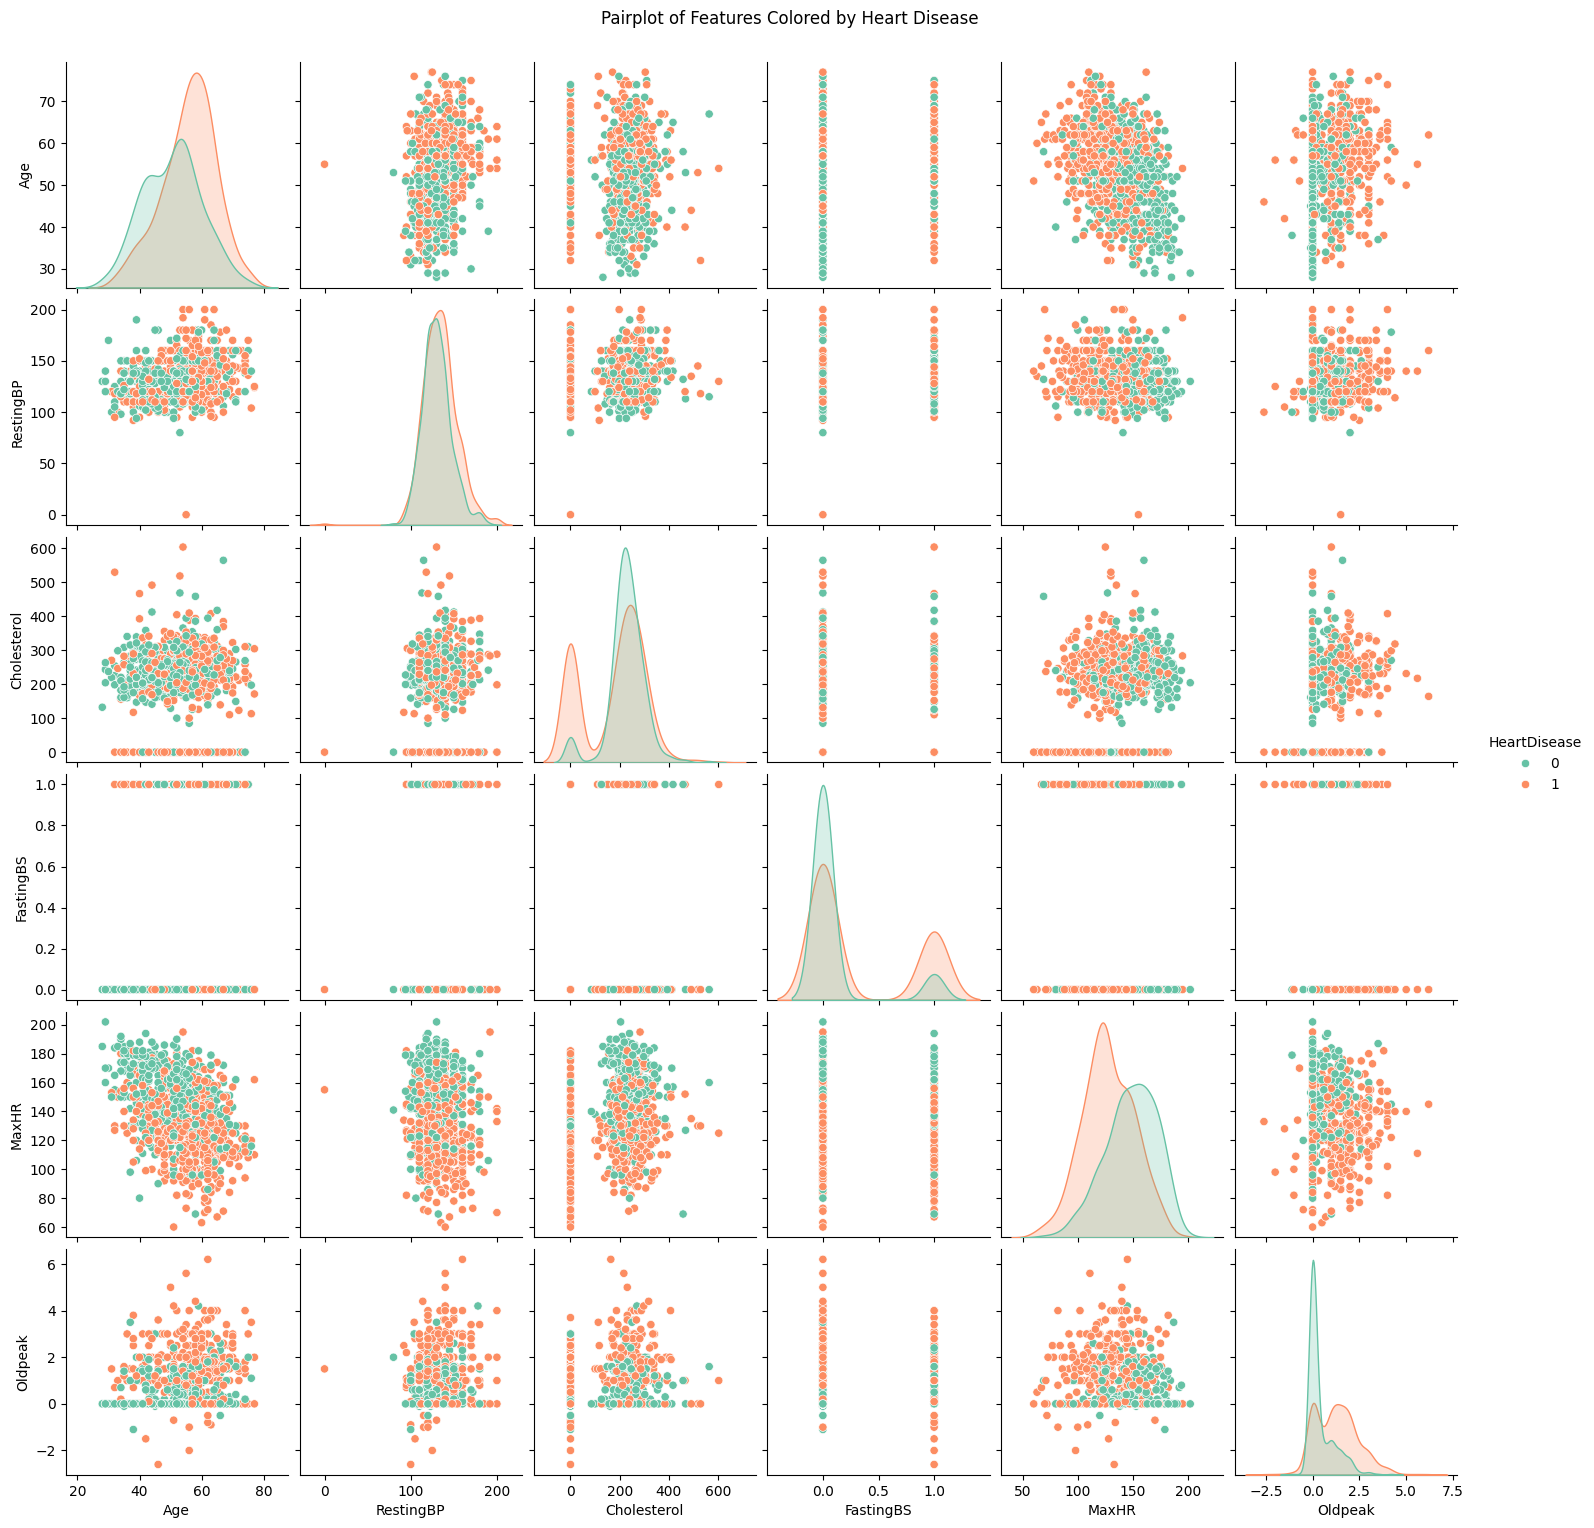

In [118]:
sns.pairplot(df, hue='HeartDisease', palette='Set2', diag_kind='kde',)
plt.suptitle('Pairplot of Features Colored by Heart Disease', y=1.02)
plt.show()

# The pairplot shows the relationships between all pairs of features in the dataset, colored by heart disease status.
# There are no specific trends in the pairplot that indicate a strong relationship between any two features and heart disease.
# However, there are some features that seem to be more strongly correlated with heart disease than others.
# The diagonal shows the kernel density estimate (KDE) of each feature. This gives an idea of the distribution of each feature.
# The scatter plots show the relationships between pairs of features with different colors representing heart disease status. 
# The pairplot shows that there are some features that are more strongly correlated with heart disease than others.
# For example: Age, Cholesterol, and Oldpeak seem to have a stronger relationship with heart disease than MaxHR and FastingBS.
# The pairplot also shows that there are some features that are more strongly correlated with each other than others.
# For example: Age and Cholesterol seem to be positively correlated while MaxHR and Oldpeak seem to be negatively correlated.


C:\Users\madhu\AppData\Local\Temp\ipykernel_32492\4026672528.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ChestPainType', y='HeartDisease', data=df, palette='Set2')


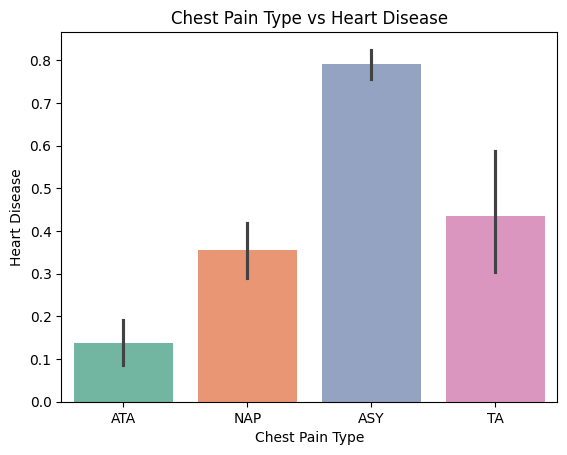

In [119]:
sns.barplot(x='ChestPainType', y='HeartDisease', data=df, palette='Set2')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Heart Disease')
plt.show() 

# The barplot shows the relationship between chest pain type and heart disease status.
# The ASY pain type has the highest probability of heart disease, followed by the typical angina and non-anginal pain types.
# The barplot shows that patients with typical angina (value 0) have a higher prevalence of heart disease compared to those with atypical angina (value 1) or non-anginal pain (value 2).
# The barplot also shows that patients with asymptomatic chest pain (value 3) have the lowest prevalence of heart disease.

C:\Users\madhu\AppData\Local\Temp\ipykernel_32492\3229098913.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RestingECG', y='HeartDisease', data=df, palette='Set2')


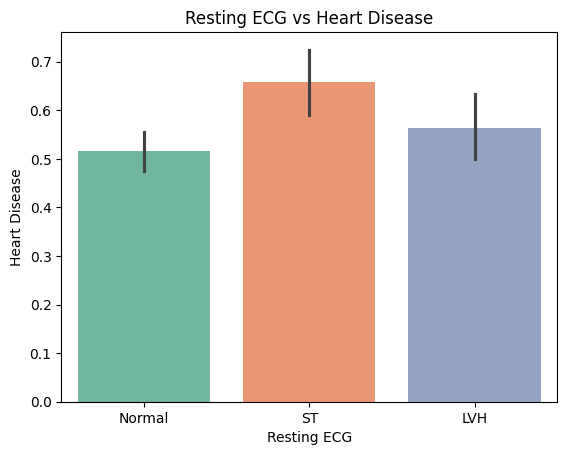

In [120]:
sns.barplot(x='RestingECG', y='HeartDisease', data=df, palette='Set2')
plt.title('Resting ECG vs Heart Disease')
plt.xlabel('Resting ECG')
plt.ylabel('Heart Disease')
plt.show() 

# The barplot shows the relationship between resting ECG results and heart disease status.	
# The ST Resting ECG results has the highest probability of heart disease, followed by the normal and left ventricular hypertrophy ECG results.
# The barplot shows that patients with normal resting ECG (value 0) have a lower prevalence of heart disease compared to those with ST-T wave abnormality (value 1) or left ventricular hypertrophy (value 2).

C:\Users\madhu\AppData\Local\Temp\ipykernel_32492\3497145324.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExerciseAngina', y='HeartDisease', data=df, palette='Set2')


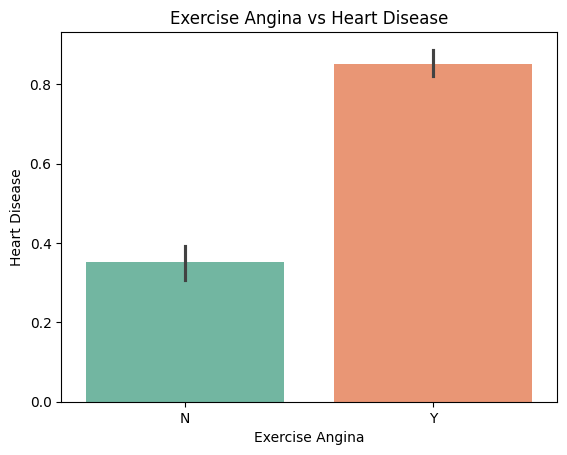

In [121]:
sns.barplot(x='ExerciseAngina', y='HeartDisease', data=df, palette='Set2')
plt.title('Exercise Angina vs Heart Disease')
plt.xlabel('Exercise Angina')
plt.ylabel('Heart Disease')
plt.show() 

# The barplot shows the relationship between exercise angina and heart disease status.	
# The Exercise Angina with variable Y has a higher probability of heart disease than the variable N.
# The barplot shows that patients with exercise angina (value 1) have a higher prevalence of heart disease compared to those without exercise angina (value 0).

C:\Users\madhu\AppData\Local\Temp\ipykernel_32492\1237085921.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ST_Slope', y='HeartDisease', data=df, palette='Set2')


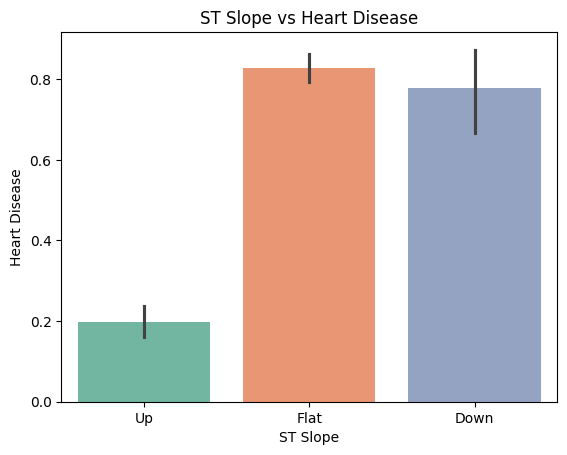

In [122]:
sns.barplot(x='ST_Slope', y='HeartDisease', data=df, palette='Set2')
plt.title('ST Slope vs Heart Disease')
plt.xlabel('ST Slope')
plt.ylabel('Heart Disease')
plt.show()

# The barplot shows the relationship between ST slope and heart disease status.
# The ST slope with variable 2 has a higher probability of heart disease than the variable 0 and 1.
# The barplot shows that patients with flat ST slope (value 1) have a higher prevalence of heart disease compared to those with upsloping (value 0) or downsloping (value 2) ST slope.

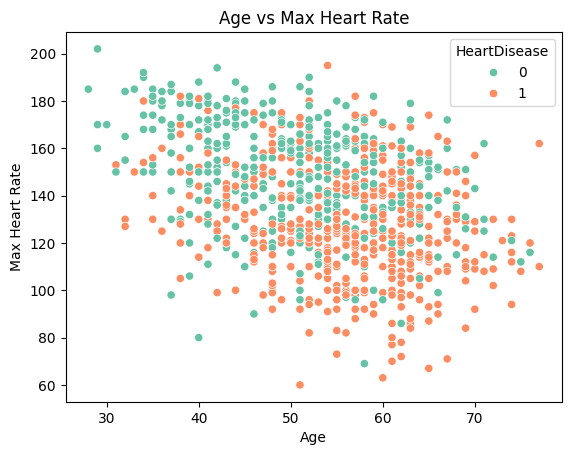

In [123]:
# Age vs MaxHR 
sns.scatterplot(x='Age', y='MaxHR', data=df, hue='HeartDisease', palette='Set2')
plt.title('Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show() 

# The scatterplot shows the relationship between age and max heart rate, colored by heart disease status.
# The scatterplot shows that there is a negative correlation between age and max heart rate, meaning that as age increases, max heart rate tends to decrease.


In [124]:
df.head() 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


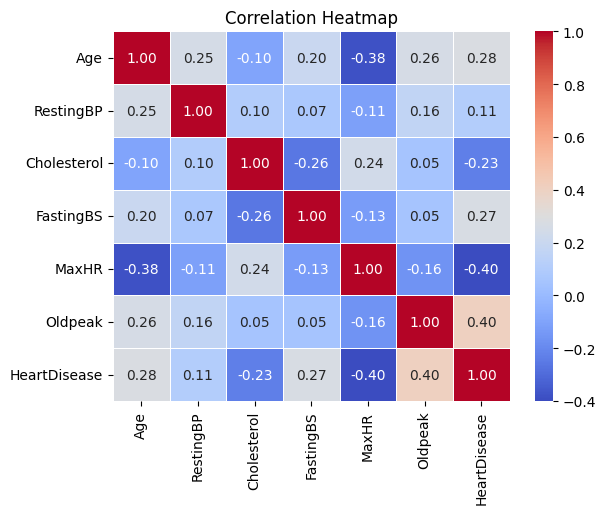

In [125]:
corr = df.corr(numeric_only=True)  
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# The heatmap shows the correlation between all features in the dataset. 


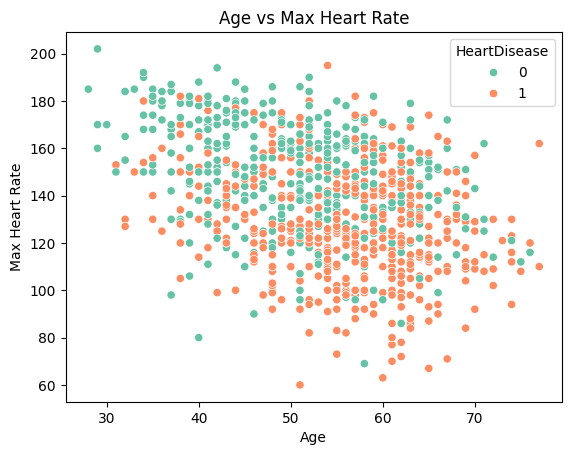

In [126]:
sns.scatterplot(x='Age', y='MaxHR', data=df, hue='HeartDisease', palette='Set2')
plt.title('Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()


In [127]:
df.Oldpeak.value_counts(normalize=True)
df[df.Oldpeak == 0].shape[0]

368

In [128]:
df[df.Oldpeak != 0].shape[0]

550

In [129]:
# we can see that the Oldpeak feature has a lot of 0 values, which may not be useful for our analysis.
# so we can create a new feature called depression that will be 1 if Oldpeak is greater than 0 and 0 otherwise.
df['Depression'] = np.where(df['Oldpeak'] > 0, 1, 0)
df.head()  

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Depression
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0


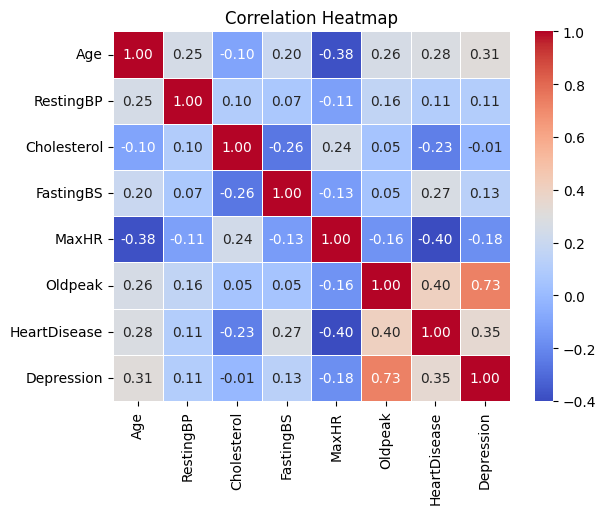

In [130]:
corr = df.corr(numeric_only=True)  
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [131]:
df.shape 

(918, 13)

In [132]:
# outliers detection using standard deviation method
def outliers_removal(col, df): 
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std()
    df = df[(df[col] < upper_limit) & (df[col] > lower_limit)]
    return df

columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in columns: 
    df2 = outliers_removal(col, df)
    print(f"Number of outliers in {col}: {df.shape[0] - df2.shape[0]}")

df2.shape 

Number of outliers in Age: 0
Number of outliers in RestingBP: 8
Number of outliers in Cholesterol: 3
Number of outliers in MaxHR: 1
Number of outliers in Oldpeak: 7


(911, 13)

In [133]:
df2.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            47
ST_Slope            3
HeartDisease        2
Depression          2
dtype: int64

In [134]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 911 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    int64  
 1   Sex             911 non-null    object 
 2   ChestPainType   911 non-null    object 
 3   RestingBP       911 non-null    int64  
 4   Cholesterol     911 non-null    int64  
 5   FastingBS       911 non-null    int64  
 6   RestingECG      911 non-null    object 
 7   MaxHR           911 non-null    int64  
 8   ExerciseAngina  911 non-null    object 
 9   Oldpeak         911 non-null    float64
 10  ST_Slope        911 non-null    object 
 11  HeartDisease    911 non-null    int64  
 12  Depression      911 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 99.6+ KB


In [135]:
# label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df3 = df2.copy()

df3.Sex = df3.Sex.replace({'M': 1, 'F': 0})
df3.ChestPainType = df3.ChestPainType.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}) 
df3.RestingECG = df3.RestingECG.replace({'Normal': 0, 'ST': 1, 'LVH': 2})
df3.ExerciseAngina = df3.ExerciseAngina.replace({'N': 0, 'Y': 1})
df3.ST_Slope = df3.ST_Slope.replace({'Up': 0, 'Flat': 1, 'Down': 2})


C:\Users\madhu\AppData\Local\Temp\ipykernel_32492\3910132629.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3.Sex = df3.Sex.replace({'M': 1, 'F': 0})
C:\Users\madhu\AppData\Local\Temp\ipykernel_32492\3910132629.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3.ChestPainType = df3.ChestPainType.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
C:\Users\madhu\AppData\Local\Temp\ipykernel_32492\3910132629.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retai

In [136]:
df3.head() 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Depression
0,40,1,0,140,289,0,0,172,0,0.0,0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0,0


In [137]:
X = df3.drop(['HeartDisease', 'Oldpeak'], axis=1)
y = df3['HeartDisease']

In [138]:
X.head() 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,Depression
0,40,1,0,140,289,0,0,172,0,0,0
1,49,0,1,160,180,0,0,156,0,1,1
2,37,1,0,130,283,0,1,98,0,0,0
3,48,0,2,138,214,0,0,108,1,1,1
4,54,1,1,150,195,0,0,122,0,0,0


In [139]:
y.head() 

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

### 🤖 Model Selection

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, ShuffleSplit

In [159]:
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'C': [10, 100],
                'solver': ['liblinear', 'saga'],
            }
        }, 
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10, 50, 100],
                'criterion': ['gini', 'entropy']
            }
        },
        'svm': {
            'model': SVC(gamma='auto'),
            'params': {
                'C': [1, 10],
            }
        },
        'knn': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7, 9],
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    
    for model_name, model in models.items(): 
        rs = RandomizedSearchCV(model['model'], model['params'], cv=cv,  n_jobs=-1, random_state=42)
        rs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': rs.best_score_,
            'best_params': rs.best_params_
        })
    return pd.DataFrame(scores) 

In [160]:
scores = find_best_model(X, y)
scores 

C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C

,model,best_score,best_params
0,logistic_regression,0.857923,"{'solver': 'liblinear', 'C': 100}"
1,decision_tree,0.806557,"{'min_samples_split': 10, 'max_depth': 10, 'cr..."
2,random_forest,0.878689,"{'n_estimators': 100, 'criterion': 'gini'}"
3,svm,0.561749,{'C': 10}
4,knn,0.704918,{'n_neighbors': 5}


In [176]:
# best model is Random Forest Classifier with 0.87 accuracy and the best parameters are {'n_estimators': 100, 'criterion': 'gini'} 
# we can use this model to predict the heart disease status of new patients.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
rf_clf.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

In [177]:
rf_clf.score(X_test, y_test)

0.8743169398907104

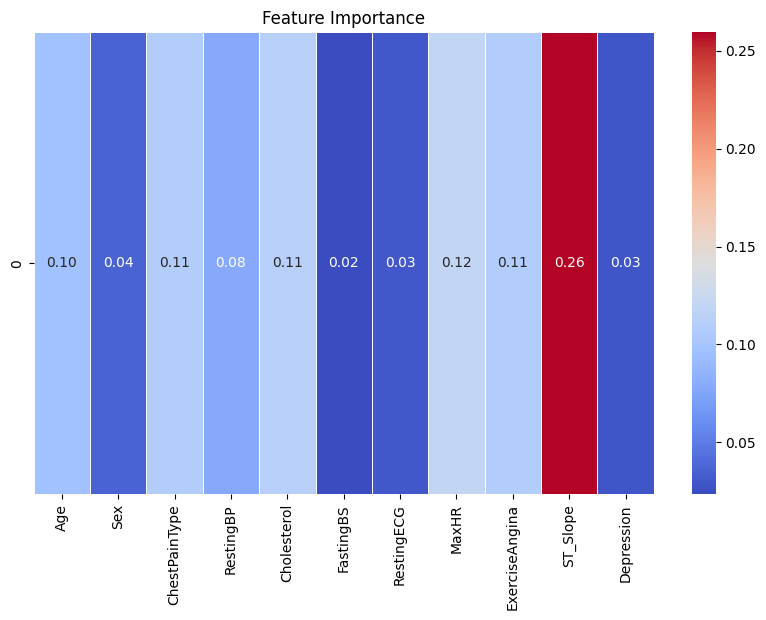

In [181]:
importance = rf_clf.feature_importances_
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(importance.reshape(1, -1), columns=X.columns), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Importance')
plt.show()

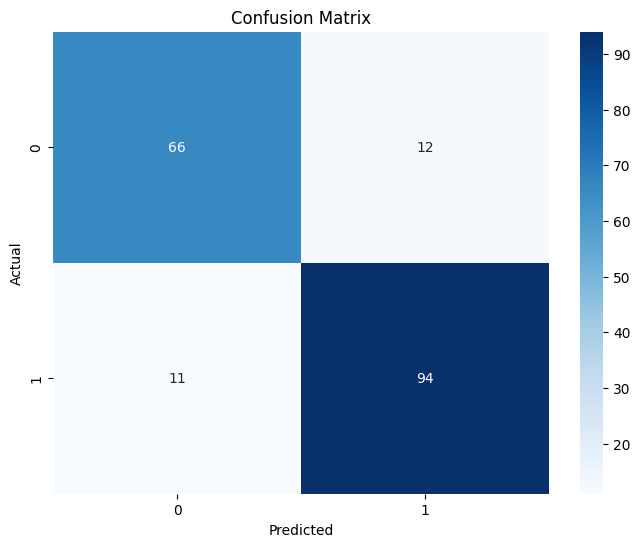

In [184]:
y_pred = rf_clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [186]:
# precision, recall, f1-score and support for each class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85        78
           1       0.89      0.90      0.89       105

    accuracy                           0.87       183
   macro avg       0.87      0.87      0.87       183
weighted avg       0.87      0.87      0.87       183



In [221]:
# Bagging Classifier
# Bagging is an ensemble method that combines the predictions of multiple base estimators to improve the overall performance of the model.
from sklearn.ensemble import BaggingClassifier

Bagging_clf = BaggingClassifier(estimator=rf_clf, n_estimators=10, random_state=0)
Bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=0),
                  random_state=0)

In [222]:
Bagging_clf.score(X_test, y_test)

0.8852459016393442

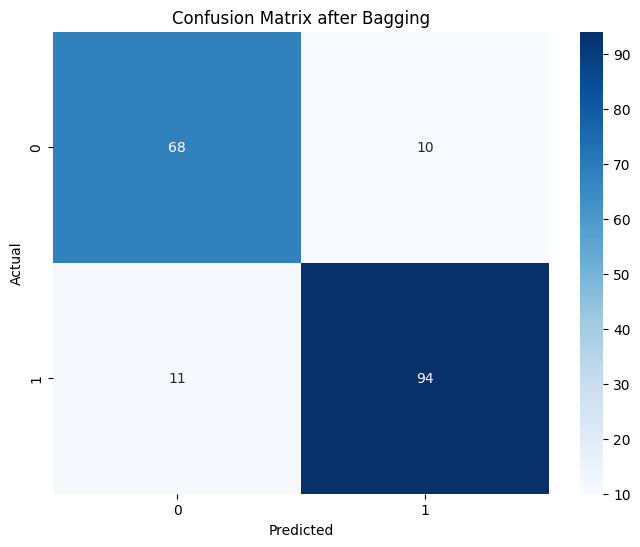

In [223]:
y_pred = Bagging_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix after Bagging')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# The confusion matrix shows that the model is able to correctly classify most of the instances, with a few false positives and false negatives.

In [224]:
X.head() 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,Depression
0,40,1,0,140,289,0,0,172,0,0,0
1,49,0,1,160,180,0,0,156,0,1,1
2,37,1,0,130,283,0,1,98,0,0,0
3,48,0,2,138,214,0,0,108,1,1,1
4,54,1,1,150,195,0,0,122,0,0,0


In [225]:
def predict_heart_disease(Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, MaxHR, ExerciseAngina, ST_Slope, Depression):
    
    x = np.zeros(len(X.columns))
    x[0] = Age  
    if Sex == 'M':
        x[1] = 1
    else:
        x[1] = 0
    if ChestPainType == 'ATA':
        x[2] = 0
    elif ChestPainType == 'NAP':
        x[2] = 1
    elif ChestPainType == 'ASY':
        x[2] = 2
    else:
        x[2] = 3
    x[3] = RestingBP
    x[4] = Cholesterol
    x[5] = FastingBS
    x[6] = MaxHR
    if ExerciseAngina == 'N':
        x[7] = 0
    else:
        x[7] = 1
    if ST_Slope == 'Up':
        x[8] = 0
    elif ST_Slope == 'Flat':
        x[8] = 1
    else:
        x[8] = 2
    if Depression == 'N':
        x[9] = 0
    else:
        x[9] = 1
    
    prediction = Bagging_clf.predict([x])[0]
    
    return prediction

In [226]:
predict_heart_disease(50, 'M', 'ATA', 120, 200, 0, 150, 'N', 'Flat', 'Y')

C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


np.int64(1)

In [227]:
predict_heart_disease(70, 'M', 'ATA', 230, 250, 3, 160, 'N', 'Flat', 'N') 

C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


np.int64(1)

In [228]:
import pickle
# save the model to disk

with open('heart_disease_model.pkl', 'wb') as f:
    pickle.dump(rf_clf, f) 